# Decision Trees for Classification

In [164]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import time

from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [165]:
# IMPORT AND CLEANUP DATA
# import data
techscape = pd.read_csv('train.csv')

# transform Date column into datetime type and then as float
techscape.Date = pd.to_datetime(techscape.Date).values.astype(float)

# transforming non-numerical variables into numerical, so that they can be parsed into the model
enc = LabelEncoder()
# turning OS
enc.fit(techscape['OS'])
techscape['OSn'] = enc.transform(techscape['OS'])
# turning country
enc.fit(techscape['Country'])
techscape['CountryN'] = enc.transform(techscape['Country'])
# turning type of visitor
enc.fit(techscape['Type_of_Visitor'])
techscape['Type_of_VisitorN'] = enc.transform(techscape['Type_of_Visitor'])

# drop non numerical columns
techscape = techscape.drop(['OS', 'Country', 'Type_of_Visitor'], axis=1)

# set access_id as index
techscape = techscape.set_index('Access_ID')

techscape.head()

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy,OSn,CountryN,Type_of_VisitorN
Access_ID,,,,,,,,,,,,,,,,
102863333,1.584749e+18,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,2,1,0,3,5,2
103117814,1.589933e+18,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,2,6,0,6,1,2
103201891,1.607040e+18,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,4,1,0,6,3,2
103226087,1.608595e+18,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,2,2,1,6,8,2
103234445,1.606176e+18,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,2,3,1,6,6,2


In [208]:
# splitting data
y = techscape.iloc[:,-4]
X_train, X_test, y_train, y_test = train_test_split(techscape.drop('Buy', axis=1),techscape['Buy'], test_size = 0.2, random_state = 15, stratify = y)

In [167]:
# creating and fitting decision tree based on tested parameters
dt_200ent = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 200).fit(X_train, y_train)

In [168]:
# confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y, dt_200ent.predict(X)))

[[1129  262    0]
 [  61   13    0]
 [7526 1008    0]]


In [169]:
# accuracy score
print("DT accuracy is %2.2f" % accuracy_score( 
     y, dt_200ent.predict(X)))

DT accuracy is 0.11


In [170]:
# classification report
pred=dt_200ent.predict(X)

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.13      0.81      0.22      1391
           1       0.01      0.18      0.02        74
           2       0.00      0.00      0.00      8534

    accuracy                           0.11      9999
   macro avg       0.05      0.33      0.08      9999
weighted avg       0.02      0.11      0.03      9999



In [171]:
# importing test data and cleanup

test_data = pd.read_csv('test.csv')

# cleanup dataset
# transforming Date column into datetime type and then as float
test_data.Date = pd.to_datetime(test_data.Date).values.astype(float)

# transforming non-numerical variables into numerical,  so that they can be parsed into the model
enc = LabelEncoder()
# turning OS
enc.fit(test_data['OS'])
test_data['OSn'] = enc.transform(test_data['OS'])
# turning country
enc.fit(test_data['Country'])
test_data['CountryN'] = enc.transform(test_data['Country'])
# turning type of visitor
enc.fit(test_data['Type_of_Visitor'])
test_data['Type_of_VisitorN'] = enc.transform(test_data['Type_of_Visitor'])

#dropping non-numerical columns
test_data = test_data.drop(['OS', 'Country', 'Type_of_Visitor'], axis=1)

# set access_id as index
test_data = test_data.set_index('Access_ID')

test_data.head()

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,OSn,CountryN,Type_of_VisitorN
Access_ID,,,,,,,,,,,,,,,
798519314,1.598227e+18,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,0.0000,2,1,6,0,2
798663101,1.590365e+18,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,0.0000,1,4,0,6,2
798663221,1.604275e+18,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,0.0000,6,3,6,6,2
798760918,1.589414e+18,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,0.0000,2,2,6,6,0
798856982,1.604534e+18,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,1.0353,4,10,6,5,2


In [172]:
# predictions on test data
y_pred = dt_200ent.predict(test_data)
y_pred.mean()

0.12869565217391304

In [173]:
# add predictions into df
predictions = dt_200ent.predict(test_data)
buy = np.around(predictions,0)
buy = buy.astype(int)

test_data['Buy'] = buy
test_data.reset_index(inplace=True)
test_data

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,OSn,CountryN,Type_of_VisitorN,Buy
0,798519314,1.598227e+18,0,0.00,0,0.000,86,5332.5478,0.0139,0.0654,0.0000,2,1,6,0,2,0
1,798663101,1.590365e+18,2,37.50,0,0.000,55,1420.4725,0.0012,0.0058,0.0000,1,4,0,6,2,0
2,798663221,1.604275e+18,0,0.00,0,0.000,36,788.5000,0.0000,0.0250,0.0000,6,3,6,6,2,0
3,798760918,1.589414e+18,0,0.00,0,0.000,2,689.0000,0.0000,0.1000,0.0000,2,2,6,6,0,0
4,798856982,1.604534e+18,12,225.25,1,0.000,129,3367.0413,0.0014,0.0185,1.0353,4,10,6,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,962042726,1.606435e+18,10,720.50,2,88.725,220,10580.3448,0.0048,0.0221,0.0000,2,1,6,5,2,0
2296,962063064,1.584662e+18,0,0.00,0,0.000,3,55.0000,0.0667,0.1000,0.0000,2,3,3,6,2,0
2297,962147749,1.606003e+18,2,45.50,0,0.000,22,535.0000,0.0000,0.0250,9.6503,2,11,6,6,2,1
2298,962182167,1.605744e+18,8,166.70,0,0.000,9,171.7000,0.0167,0.0500,0.0000,2,3,6,5,2,0


In [174]:
# sanity check
test_data.Buy.unique()

array([0, 1])

In [175]:
# exporting prediction results
submission = test_data.copy()
submission = submission[['Access_ID', 'Buy']]
submission.to_csv('dt200ent.csv', index=False)

In [176]:
# defining function to plot tree
def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train.columns,  
                               class_names=["0", "1"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,50"')
    return graphviz.Source(pydot_graph.to_string())

In [177]:
# printing details of final tree
print('The defined three has a depth of ' + str(dt_200ent.get_depth()) + ', ' + str(dt_200ent.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_200ent.get_n_leaves()) + ' leaves.')

The defined three has a depth of 17, 121 nodes and a total of 61 leaves.


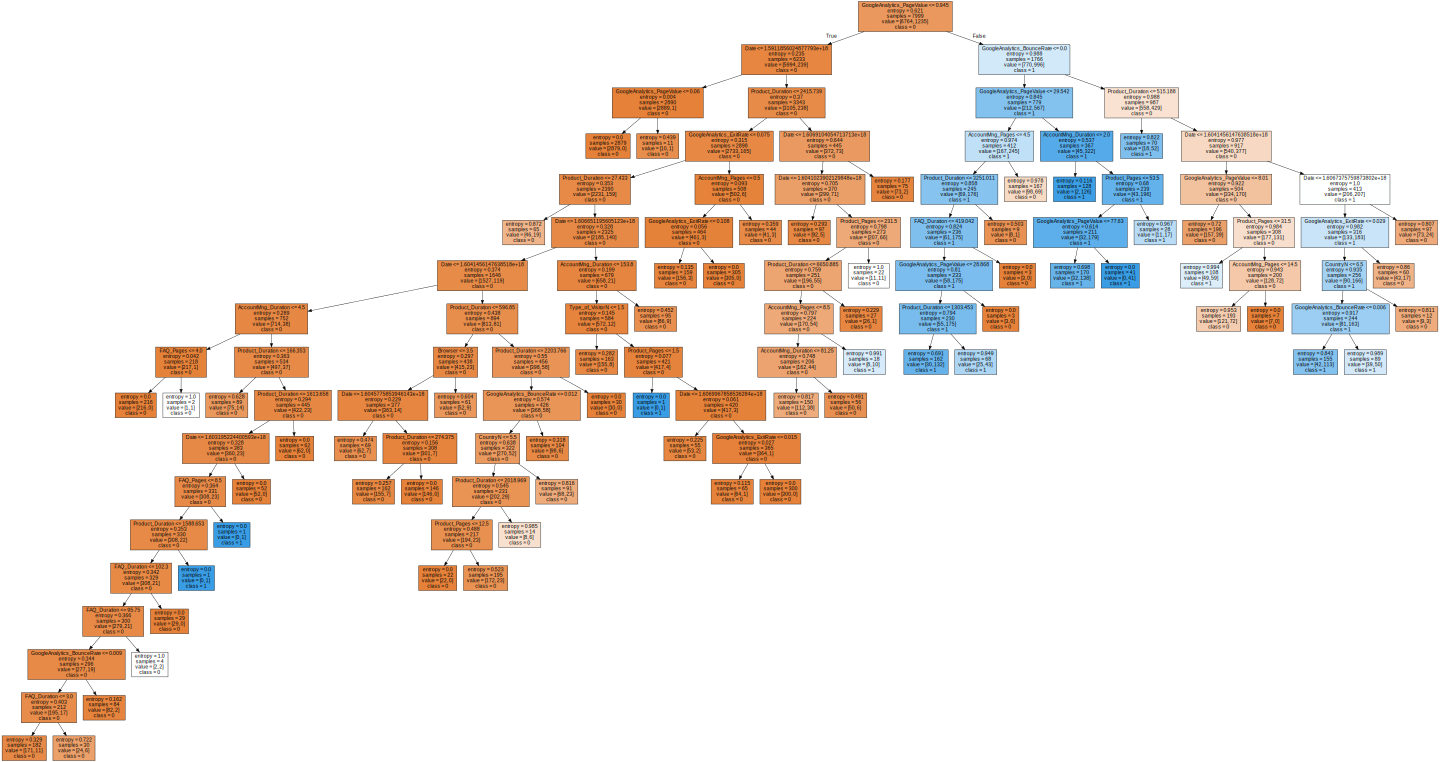

In [178]:
# plotting final tree
plot_tree(dt_200ent)

TESTING PARAMETERS FOR GBC

In [179]:
# defining function to score each model
def avg_score(model):
    # apply kfold
    skf = StratifiedKFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in skf.split(X,y):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)

In [180]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

In [181]:
# creating instance of decision tree classifier
dt_gini = DecisionTreeClassifier()

In [182]:
# fitting data to model
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [183]:
# checking predicted values
y_pred = dt_gini.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [184]:
# checking predicted class probabilities
y_pred_prob = dt_gini.predict_proba(X_test)
y_pred_prob

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [185]:
# creating new instance of decision tree with entropy
dt_entropy = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)

In [186]:
# comparing results of gini with entropy
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Gini','Entropy'])
show_results(df,dt_gini, dt_entropy)

,Time,Train,Test
Gini,0.071+/-0.01,1.0+/-0.0,0.824+/-0.01
Entropy,0.097+/-0.01,1.0+/-0.0,0.831+/-0.01


2. Avoiding Overfitting

In [187]:
# creating new instance of decision tree with random feature and random split
dt_random = DecisionTreeClassifier(splitter = 'random').fit(X_train, y_train)

In [188]:
# comparing results of random with gini
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['best','random'])
show_results(df,dt_gini, dt_random)

,Time,Train,Test
best,0.066+/-0.0,1.0+/-0.0,0.823+/-0.01
random,0.02+/-0.0,1.0+/-0.0,0.823+/-0.01


In [189]:
# creating decision tree depth of 2
dt_depth2 = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

In [190]:
# comparing full tree to 2 level tree
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['full','depth2'])
show_results(df,dt_gini, dt_depth2)

,Time,Train,Test
full,0.082+/-0.01,1.0+/-0.0,0.826+/-0.01
depth2,0.016+/-0.0,0.854+/-0.0,0.854+/-0.0


In [191]:
# checking predicted class probabilities with decision tree 2 level
X_test.head(1)

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,OSn,CountryN,Type_of_VisitorN
Access_ID,,,,,,,,,,,,,,,
274700152,1.605830e+18,4,305.0,0,0.0,16,1090.7,0.0,0.0417,0.0,2,2,6,5,2


In [192]:
y_pred_prob = dt_depth2.predict_proba(X_test)
y_pred_prob

array([[0.37307501, 0.01142573, 0.61549925],
       [0.03358809, 0.00160901, 0.9648029 ],
       [0.03358809, 0.00160901, 0.9648029 ],
       ...,
       [0.16683317, 0.01398601, 0.81918082],
       [0.16683317, 0.01398601, 0.81918082],
       [0.16683317, 0.01398601, 0.81918082]])

In [193]:
# creating new instance of decision tree with min 200 splits
dt_min200 = DecisionTreeClassifier(min_samples_split = 200).fit(X_train, y_train)

In [194]:
# creating new instance of decision tree with min 700 splits
dt_min700 = DecisionTreeClassifier(min_samples_split =700).fit(X_train, y_train)

# compare 200 vs 700 split models
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['dt_min200','dt_min700'])
show_results(df, dt_min200, dt_min700)

,Time,Train,Test
dt_min200,0.05+/-0.0,0.882+/-0.0,0.869+/-0.01
dt_min700,0.041+/-0.0,0.867+/-0.0,0.857+/-0.01


In [195]:
# creating new decision tree with min 100 leaves
dt_min_sam100 = DecisionTreeClassifier(min_samples_leaf = 100).fit(X_train, y_train)

In [196]:
# creating new decision tree with min 500 leaves
dt_min_sam500 = DecisionTreeClassifier(min_samples_leaf = 500).fit(X_train, y_train)

In [197]:
# compare results of gini, 100, and 500 leaf decision trees
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Original','dt_min_sam100','dt_min_sam500'])
show_results(df,dt_gini, dt_min_sam100, dt_min_sam500)

,Time,Train,Test
Original,0.073+/-0.01,1.0+/-0.0,0.824+/-0.01
dt_min_sam100,0.041+/-0.0,0.871+/-0.0,0.861+/-0.01
dt_min_sam500,0.025+/-0.0,0.859+/-0.0,0.855+/-0.01


In [198]:
# creating decision trees with various measures of max features
dt_none = DecisionTreeClassifier(max_features = None).fit(X_train, y_train)
dt_int = DecisionTreeClassifier(max_features = 2).fit(X_train, y_train)
dt_float = DecisionTreeClassifier(max_features = 0.5).fit(X_train, y_train)
dt_auto = DecisionTreeClassifier(max_features = 'auto').fit(X_train, y_train)
dt_log2 = DecisionTreeClassifier(max_features = 'log2').fit(X_train, y_train)

In [199]:
# comparing results of above models
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['None (Baseline)','Int','Float','Auto','Log2'])
show_results(df,dt_none, dt_int, dt_float, dt_auto, dt_log2)

,Time,Train,Test
None (Baseline),0.07+/-0.01,1.0+/-0.0,0.826+/-0.01
Int,0.015+/-0.0,1.0+/-0.0,0.823+/-0.01
Float,0.034+/-0.0,1.0+/-0.0,0.831+/-0.01
Auto,0.019+/-0.0,1.0+/-0.0,0.823+/-0.02
Log2,0.021+/-0.0,1.0+/-0.0,0.825+/-0.01


In [200]:
# creating decision trees with tested parameters
dt_int2 = DecisionTreeClassifier(max_features = 2, max_depth = 2).fit(X_train, y_train)
dt_int3 = DecisionTreeClassifier(max_features = 2, max_depth = 2).fit(X_train, y_train)

In [201]:
# creating decision tree with max 5 leaf nodes
dt_maxleaf5 = DecisionTreeClassifier(max_leaf_nodes = 5).fit(X_train, y_train)

# show results
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Baseline','dt_maxleaf5'])
show_results(df,dt_gini, dt_maxleaf5)

,Time,Train,Test
Baseline,0.07+/-0.01,1.0+/-0.0,0.823+/-0.01
dt_maxleaf5,0.02+/-0.0,0.855+/-0.0,0.853+/-0.0


In [202]:
# checking impurity parameter
dt_impurity02 = DecisionTreeClassifier(min_impurity_decrease=0.02).fit(X_train, y_train)

# show results
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Baseline','dt_impurity02'])
show_results(df,dt_gini, dt_impurity02)

,Time,Train,Test
Baseline,0.07+/-0.0,1.0+/-0.0,0.824+/-0.01
dt_impurity02,0.016+/-0.0,0.853+/-0.0,0.853+/-0.0


In [203]:
gini_importance = DecisionTreeClassifier().fit(X_train, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train).feature_importances_

In [204]:
gini_importance

array([0.08604796, 0.04787801, 0.05839786, 0.00631722, 0.02450354,
       0.06327303, 0.08287595, 0.06471206, 0.06187263, 0.42814622,
       0.01238889, 0.02398694, 0.01073655, 0.02343318, 0.00542998])

<AxesSubplot:xlabel='Value', ylabel='Col'>

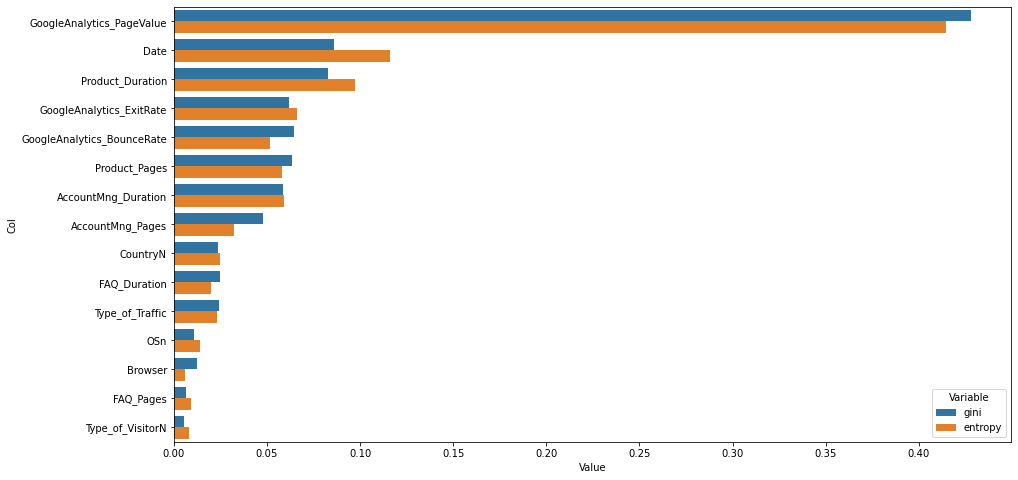

In [205]:
# plotting feature importance for gini and entropy criterions

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)